# Decisión Tree -  Breast Cancer

## Importar Librerías

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

## Cargar conjunto de datos

In [3]:
# Carga el conjunto de datos Breast Cancer
dataset = load_breast_cancer()
X = dataset.data # 569x30
y = dataset.target # 569x1

## Dividir datos de entranamiento y pruebas

In [4]:
# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalizar Datos

In [5]:
# Normaliza los datos para que todas las características tengan una escala similar
scaler = MinMaxScaler(feature_range=(0,1)) # [0, 1]
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Entrenar Modelo

In [6]:
# Crea y entrena el modelo de árbol de decisión
model = DecisionTreeClassifier(max_depth=4, criterion = 'gini')
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## Predicciones

In [7]:
# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

## Convertir probabilidades en label binaries

In [8]:
# Convierte las probabilidades en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

## Informe de Evaluación

In [9]:
# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Matriz de Confusión

confusion matrix: 
 [[40  3]
 [ 3 68]]


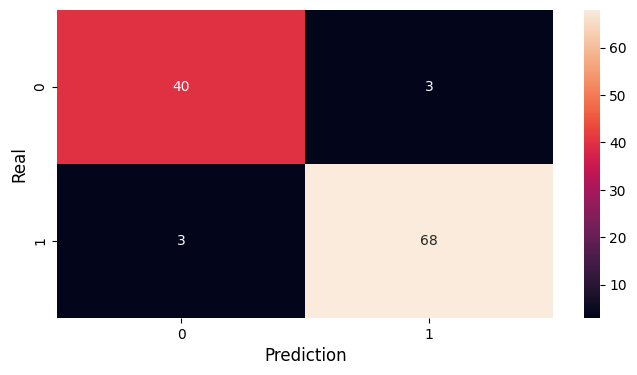

In [10]:
# Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

## Exactitud

In [11]:
# Exactitud:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)


accuracy:  0.9473684210526315


## Sensibilidad

In [12]:
# Sensibilidad:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

recall:  0.9577464788732394


## Precisión

In [13]:
# Precisión:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

precision:  0.9577464788732394


## Especificidad

In [14]:
# Especificidad
# 'specificity' is just a special case of 'recall'. 
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

specificity:  0.9302325581395349


## Puntuación F1

In [15]:
# Puntuación F1:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

f1 score:  0.9577464788732394


## Area bajo la curva

In [16]:
# Área bajo la curva:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

auc:  0.9439895185063871


## Curva ROC

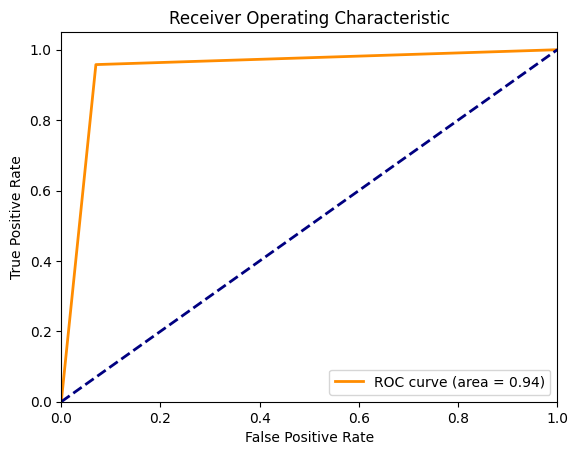

In [17]:
# Curva ROC
from sklearn.metrics import roc_curve
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## R Score

In [18]:
# R Score (R^2 coefficient of determination)
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print("R2: ", R)

R2:  0.7759580740255486


## Arbol de Decisión

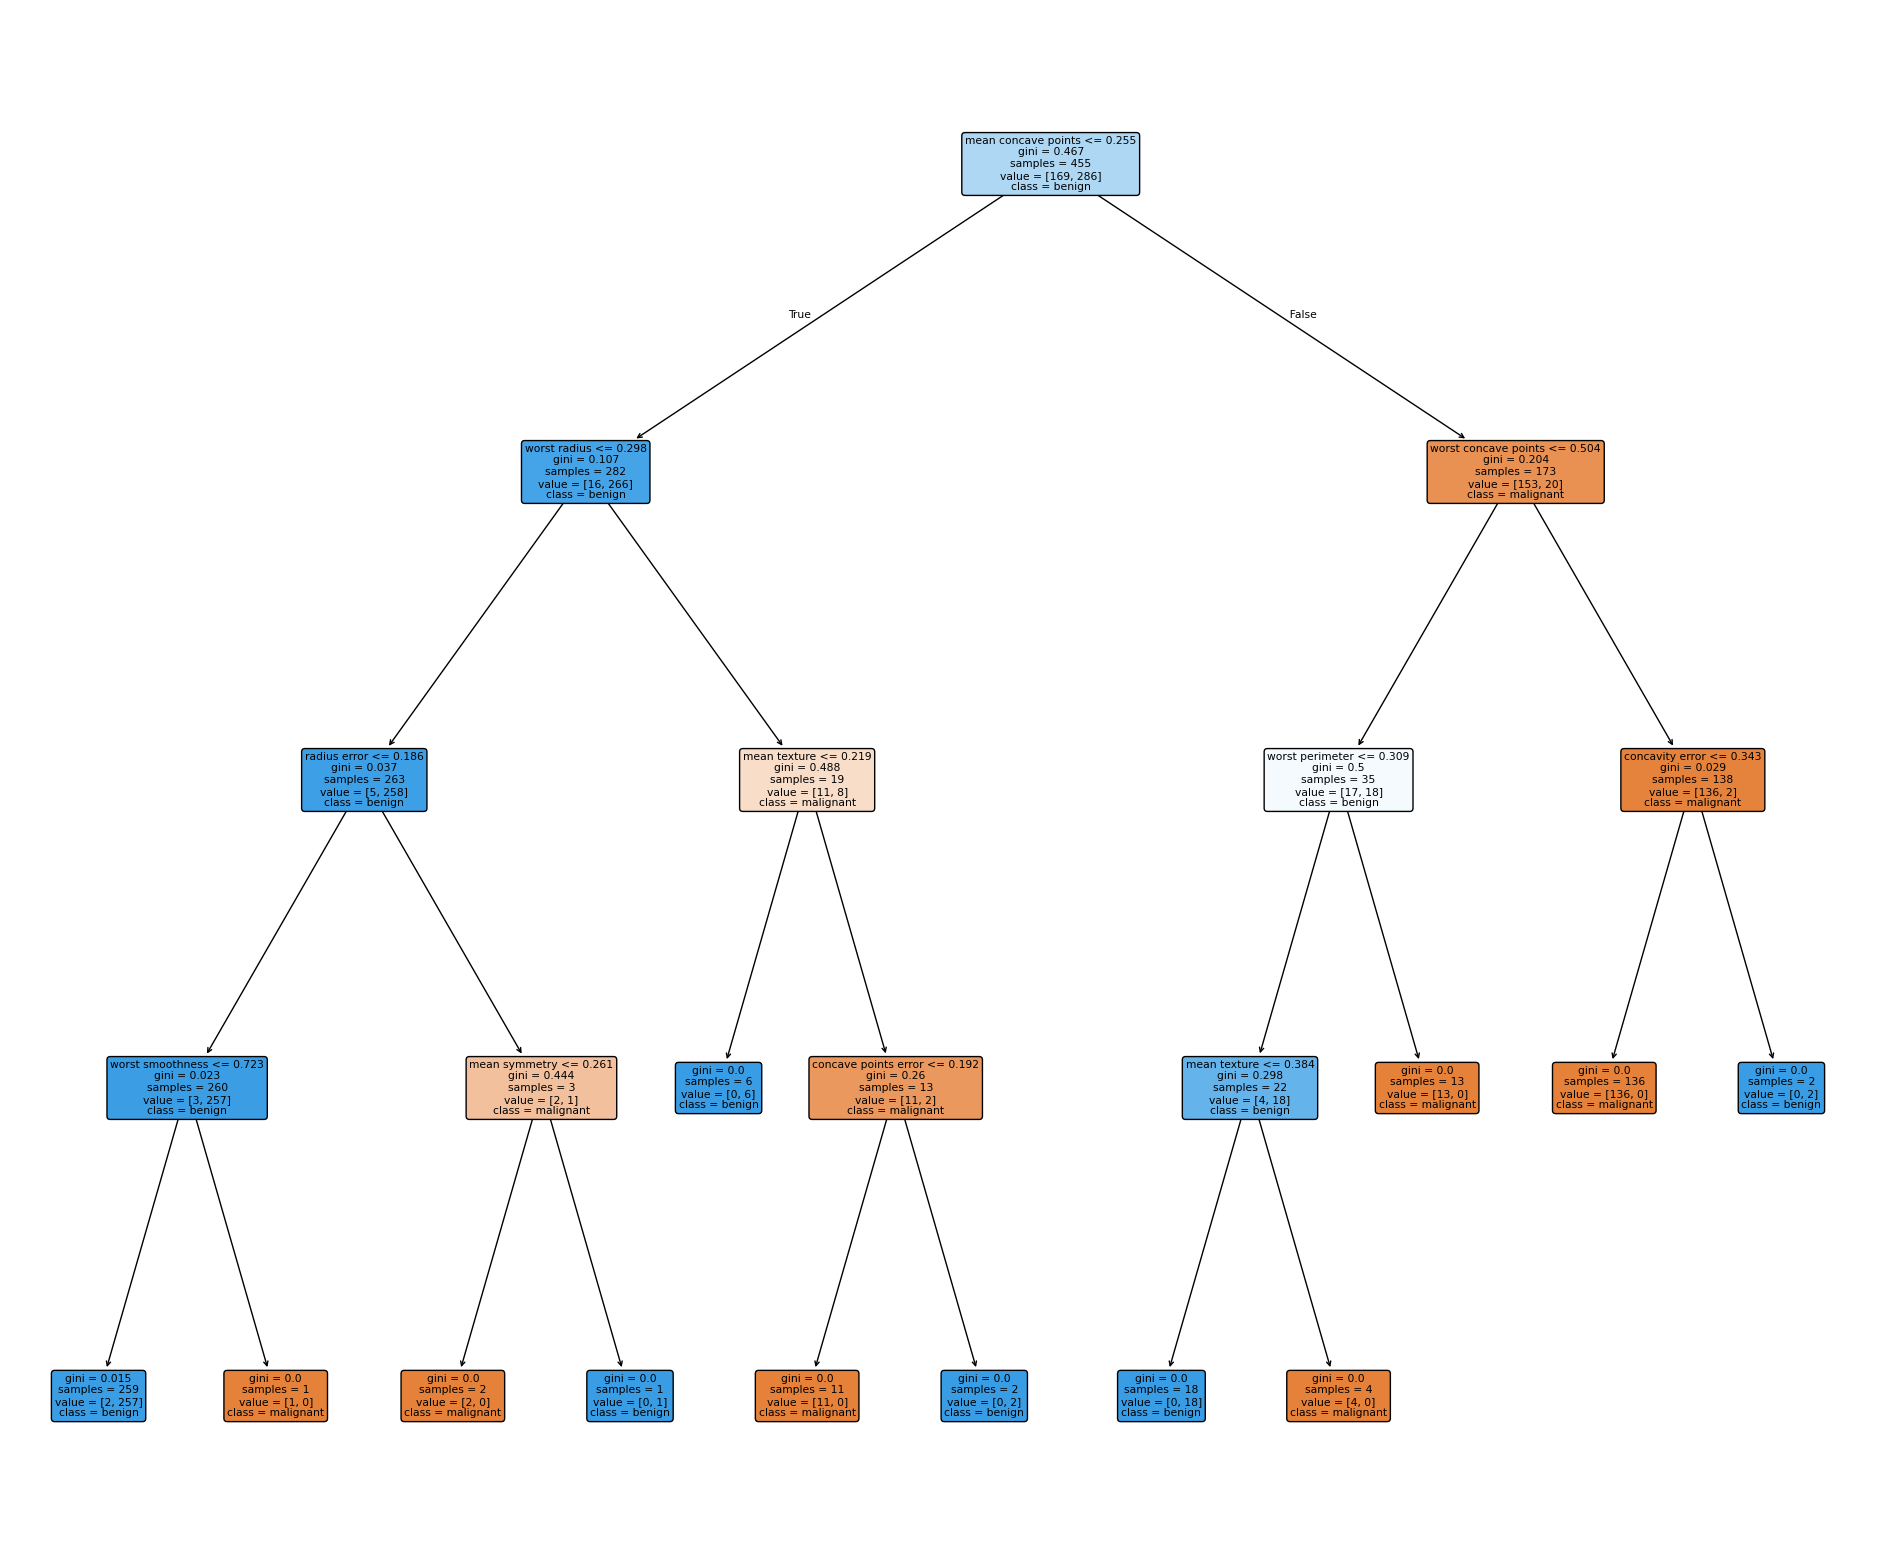

In [19]:
# Visualizar un árbol de decisión usando matplotlib
from sklearn.tree import plot_tree
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(24, 20))
# Dibujar el árbol de decisión
plot_tree(model, 
                feature_names = dataset.feature_names, 
                class_names = dataset.target_names, 
                filled=True, 
                rounded=True, 
                ax=ax)
# Mostrar la gráfica
plt.show()

## Importancias caracteristicas

In [20]:
# Calcular y visualizar la importancia de las variables en la predicción del modelo
importances = model.feature_importances_

In [21]:
# Crear un DataFrame para visualizar las importancias
import pandas as pd
feature_importances = pd.DataFrame({
    'Variable': dataset.feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(feature_importances)


                   Variable  Importancia
7       mean concave points     0.704583
27     worst concave points     0.066901
1              mean texture     0.059591
20             worst radius     0.053295
22          worst perimeter     0.052474
16          concavity error     0.018908
17     concave points error     0.016234
10             radius error     0.012211
24         worst smoothness     0.009409
8             mean symmetry     0.006395
21            worst texture     0.000000
19  fractal dimension error     0.000000
0               mean radius     0.000000
18           symmetry error     0.000000
25        worst compactness     0.000000
26          worst concavity     0.000000
28           worst symmetry     0.000000
23               worst area     0.000000
15        compactness error     0.000000
14         smoothness error     0.000000
13               area error     0.000000
12          perimeter error     0.000000
11            texture error     0.000000
9    mean fracta

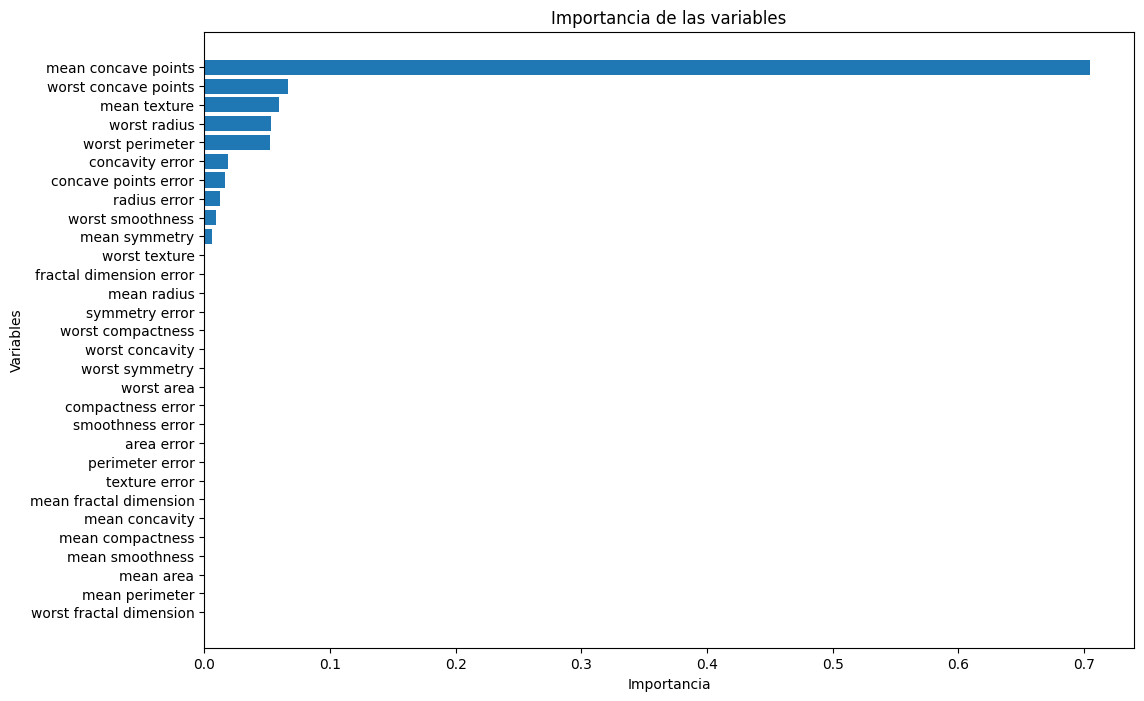

In [22]:
# Visualizar las importancias de las variables
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Variable'], feature_importances['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables')
plt.gca().invert_yaxis()
plt.show()

## Guardar Modelo

In [23]:
# Guardar el modelo a un archivo
import joblib
joblib.dump(model, 'decision_tree_model.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('decision_tree_model.pkl')
# Hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)